In [1]:
import h2o
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import h2o.grid
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM 18.9 (build 11.0.11+9-LTS-194, mixed mode)
  Starting server from C:\Users\Gerd\venvs\kaggle\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gerd\AppData\Local\Temp\tmpeyjcb_12
  JVM stdout: C:\Users\Gerd\AppData\Local\Temp\tmpeyjcb_12\h2o_Gerd_started_from_python.out
  JVM stderr: C:\Users\Gerd\AppData\Local\Temp\tmpeyjcb_12\h2o_Gerd_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_Gerd_d2g0kv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.975 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"accepting new members, healthy"


In [3]:
data = h2o.import_file('./data/prepped-train.csv')
prediction_frame = h2o.import_file('./data/test.csv')

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [4]:
train, valid, test = data.split_frame([0.8, 0.1], seed=69)

In [5]:
train.summary()

,C1,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
type,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,
mean,99973.68498381392,99973.68498381392,0.3183486931979502,0.36564483510792234,0.5500491734459247,0.5406679650507245,0.27177514670586456,0.45790127018607946,0.2991294859556951,0.2681778629486018,0.5996408894163449,0.4704289409885459,0.5266081316298459,0.28508730857545506,0.8976267322857477,0.3643080126342186,0.564269906277024,0.2542030665455751,0.5033175433504318,0.15481838182813704,0.6786103570756026,1.276409416699213,0.60271409359341,0.37349026915201433,0.29877722013534197,0.25350336704331156,0.27115345377855904,0.6624412562139533,0.3665952664966012,0.2921805365676433,0.5102731614553676,0.46171907046853533,0.3059216806639095,0.653819987434667,0.2893603936717686,0.564699820378061,0.2991554906503805,0.4282592352264514,0.23188402904398256,0.5906559293340456,0.34510841007961823,0.803682947251337,0.41589792603158104,0.3217757601911717,0.2867249282033514,1.127663440957152,0.38916945679748044,0.2872687581365381,0.4226411382399347,0.197922115170627,0.4612304430318536,0.17356503898536535,0.7335671758034046,0.5133928887068446,0.287347479374064,0.5452705187976951,1.2551790671738092,0.44291337825894184,0.7236040526834978,0.23981531559845382,0.3739363216296344,0.38196651759920386,0.4589001539574279,0.37128943427729116,0.6107418265973734,0.29938733780677523,0.2688491136318641,0.5149548175381061,0.20079762106679616,0.40529700868240587,0.304296036953908,0.5247601811992488,0.3815535961986885,0.32444777235794914,0.44660848826392696,0.46896155868027295,0.17237309955159263,
maxs,199999.0,199999.0,4.127134385045092,3.951243718581427,4.174387269895637,4.2626798770413155,3.6635616461296463,4.343805421853684,3.784189633918261,3.4339872044851463,3.6635616461296463,4.290459441148391,3.5263605246161616,3.8501476017100584,3.6375861597263857,3.784189633918261,3.49650756146648,4.804021044733257,3.332204510175204,2.70805020110221,3.1354942159291497,5.575949103146316,3.4339872044851463,3.5263605246161616,4.820281565605037,3.1354942159291497,4.248495242049359,5.0106352940962555,3.218875824868201,4.442651256490317,4.663439094112067,4.442651256490317,3.1354942159291497,3.688879454113936,4.3694478524670215,3.737669618283368,3.610917912644224,3.737669618283368,3.7612001156935624,3.5553480614894135,3.737669618283368,3.912023005428146,4.406719247264253,4.30406509320417,3.9889840465642745,4.1588830833596715,3.332204510175204,3.4339872044851463,4.770684624465665,4.584967478670572,3.713572066704308,3.6635616461296463,4.04305126783455,4.30406509320417,3.663561

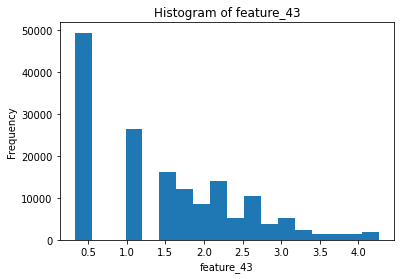

In [6]:
train["feature_43"].hist()

In [7]:
features = train.columns
features.remove("id")
features.remove("C1")
features.remove("target")

target = "target"

In [22]:
#features

['feature_0',
 'feature_1',
 'feature_2',
 'feature_3',
 'feature_4',
 'feature_5',
 'feature_6',
 'feature_7',
 'feature_8',
 'feature_9',
 'feature_10',
 'feature_11',
 'feature_12',
 'feature_13',
 'feature_14',
 'feature_15',
 'feature_16',
 'feature_17',
 'feature_18',
 'feature_19',
 'feature_20',
 'feature_21',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_27',
 'feature_28',
 'feature_29',
 'feature_30',
 'feature_31',
 'feature_32',
 'feature_33',
 'feature_34',
 'feature_35',
 'feature_36',
 'feature_37',
 'feature_38',
 'feature_39',
 'feature_40',
 'feature_41',
 'feature_42',
 'feature_43',
 'feature_44',
 'feature_45',
 'feature_46',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_50',
 'feature_51',
 'feature_52',
 'feature_53',
 'feature_54',
 'feature_55',
 'feature_56',
 'feature_57',
 'feature_58',
 'feature_59',
 'feature_60',
 'feature_61',
 'feature_62',
 'feature_63',
 'feature_64',
 'feature_65',
 'feature_66',
 'fea

In [17]:
#
# APPROACH 1: grid search deep learning model
#

In [9]:
grid = h2o.grid.H2OGridSearch(H2ODeepLearningEstimator(epochs=70, hidden = [400, 400], nfolds=25, activation = "RectifierWithDropout", distribution="multinomial", loss='crossentropy'),
                                search_criteria={"strategy":"RandomDiscrete", "max_models":5},
                                hyper_params={"seed":77, "l1":[0, 1e-6, 3e-6, 1e-5], "l2":[0, 1e-6, 3e-6, 1e-5],
                                             "input_dropout_ratio":[ 0.1, 0.2, 0.3, 0.4], #drops random n percent of input neurons
                                             "hidden_dropout_ratios":[[0,0], [0.2, 0.2], [0.4, 0.4], [0.6, 0.6]] #drops random n percent of hidden neurons
                                             },
                                grid_id="deeplearning-grid"
               )

grid.train(x = features, y = target, training_frame = train, validation_frame = valid)

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [11]:
grid.logloss()

{'deeplearning-grid_model_1': 1.7605391775468586,
 'deeplearning-grid_model_5': 1.7879772782480623,
 'deeplearning-grid_model_4': 1.7994283268056035,
 'deeplearning-grid_model_3': 1.7883709698141783,
 'deeplearning-grid_model_2': 1.7974080143563362}

In [17]:
#saving model
#grid_save = h2o.get_model(grid[4].model_id)
#h2o.save_model(grid_save, 'C:/Users/Gerd/Desktop/dev/machine-learning-models/h2o-models/deeplearning-5-0.1')

In [26]:
grid[4].model_performance(test)


ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.6152180109804156
RMSE: 0.7843583434760005
LogLoss: 1.784787381726709
Mean Per-Class Error: 0.8144203792914461
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Error,Rate
0,0.0,298.0,0.0,0.0,0.0,211.0,0.0,408.0,0.0,1.000000,917 / 917
1,0.0,1457.0,0.0,0.0,0.0,351.0,0.0,656.0,0.0,0.408685,1Â 007 / 2Â 464
2,0.0,727.0,0.0,0.0,0.0,259.0,0.0,502.0,0.0,1.000000,1Â 488 / 1Â 488
3,0.0,150.0,0.0,0.0,0.0,105.0,0.0,210.0,0.0,1.000000,465 / 465
4,0.0,90.0,0.0,0.0,0.0,67.0,0.0,147.0,0.0,1.000000,304 / 304
5,0.0,837.0,0.0,0.0,0.0,2524.0,0.0,1953.0,0.0,0.525028,2Â 790 / 5Â 314
6,0.0,237.0,0.0,0.0,0.0,372.0,0.0,861.0,0.0,1.000000,1Â 470 / 1Â 470
7,0.0,610.0,0.0,0.0,0.0,1446.0,0.0,3135.0,0.0,0.396070,2Â 056 / 5Â 191
8,0.0,818.0,0.0,0.0,0.0,573.0,0.0,1175.0,0.0,1.000000,2Â 566 / 2Â 566
9,0.0,5224.0,0.0,0.0,0.0,5908.0,0.0,9047.0,0.0,0.647356,13Â 063 / 20Â 179



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.352644
1,2,0.568908
2,3,0.693196
3,4,0.795580
4,5,0.866594
5,6,0.918727
6,7,0.958918
7,8,0.983597
8,9,1.000000


In [20]:
grid[0].predict(test)

deeplearning prediction progress: |███████████████████████████████████████| 100%


predict,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
Class_8,0.044877,0.160661,0.0999485,0.023547,0.00971844,0.04279,0.09646,0.340104,0.181894
Class_6,0.0284406,0.164586,0.0839594,0.0128445,0.00514287,0.481423,0.0228492,0.0801778,0.120577
Class_8,0.057459,0.0457054,0.0423368,0.0245136,0.0158051,0.12478,0.129064,0.406964,0.153372
Class_8,0.0466674,0.17773,0.0990627,0.0282332,0.0112689,0.160185,0.0691921,0.241821,0.165839
Class_6,0.0584014,0.0815809,0.0669041,0.0269087,0.015683,0.264636,0.0804331,0.254606,0.150847
Class_6,0.047132,0.068854,0.0508835,0.0238839,0.012728,0.364639,0.0736078,0.233063,0.125209
Class_8,0.0673605,0.0534731,0.0433891,0.0264767,0.0188987,0.178326,0.125596,0.351167,0.135312
Class_2,0.0816537,0.353556,0.157761,0.0256695,0.00663275,0.160093,0.0230398,0.0604149,0.131179
Class_8,0.0563588,0.0671693,0.0592519,0.0249871,0.0175234,0.255164,0.0938724,0.289457,0.136216
Class_6,0.0536716,0.116111,0.0753746,0.0245643,0.0114591,0.317259,0.0600942,0.198278,0.143188


In [27]:
output = grid[1].predict(prediction_frame)

deeplearning prediction progress: |███████████████████████████████████████| 100%


In [ ]:
#
# APPROACH 2: grid search generalized linear model
#

In [9]:
grid2 = h2o.grid.H2OGridSearch(
    H2OGeneralizedLinearEstimator(
    family = "multinomial",
    lambda_search = True,
    balance_classes = True,
    ),
    hyper_params = {
        "alpha":[x * 0.01 for x in range (0, 100)],
    },
    search_criteria = {
        "strategy":"RandomDiscrete",
        "max_models":8,
        "max_runtime_secs":60
    },
    grid_id="glm-grid",
)
grid2.train(x = features, y = target, training_frame = train, validation_frame = valid)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [ ]:
#
# APPROACH 3: gbm model
#

In [26]:
gbm = H2OGradientBoostingEstimator(model_id = 'gbm-model', stopping_metric='logloss', score_tree_interval=1, #balance_classes= True,
                                                  stopping_tolerance=0.001 ,stopping_rounds=5, ntrees=500, nfolds=8, max_depth=5)

gbm.train(x = features, y = target, training_frame = train, validation_frame = valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [27]:
#
# load existing gbm:
#

#gbm = h2o.load_model('./models/gbm-model')

In [28]:
gbm.model_performance(test)


ModelMetricsMultinomial: gbm
** Reported on test data. **

MSE: 0.6108776593828907
RMSE: 0.7815866294806294
LogLoss: 1.754164592076222
Mean Per-Class Error: 0.8373798575654634
AUC: NaN
AUCPR: NaN
Multinomial auc values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).
Multinomial auc_pr values: Table is not computed because it is disabled (model parameter 'auc_type' is set to AUTO or NONE) or due to domain size (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Error,Rate
0,0.0,249.0,0.0,0.0,0.0,0.0,1.0,662.0,4.0,1.000000,916 / 916
1,0.0,1388.0,1.0,0.0,0.0,1.0,0.0,1084.0,29.0,0.445465,1Â 115 / 2Â 503
2,0.0,667.0,0.0,0.0,0.0,0.0,0.0,802.0,9.0,1.000000,1Â 478 / 1Â 478
3,0.0,133.0,1.0,0.0,0.0,0.0,0.0,351.0,6.0,1.000000,491 / 491
4,0.0,73.0,0.0,0.0,1.0,0.0,0.0,243.0,1.0,0.996855,317 / 318
5,0.0,40.0,0.0,0.0,0.0,1.0,0.0,290.0,3.0,0.997006,333 / 334
6,0.0,212.0,0.0,0.0,0.0,0.0,0.0,1288.0,10.0,1.000000,1Â 510 / 1Â 510
7,0.0,527.0,1.0,1.0,0.0,0.0,4.0,4565.0,23.0,0.108573,556 / 5Â 121
8,0.0,690.0,0.0,0.0,0.0,0.0,1.0,1806.0,29.0,0.988519,2Â 497 / 2Â 526
9,0.0,3979.0,3.0,1.0,1.0,2.0,6.0,11091.0,114.0,0.606238,9Â 213 / 15Â 197



Top-9 Hit Ratios: 


,k,hit_ratio
0,1,0.393762
1,2,0.563532
2,3,0.710732
3,4,0.804501
4,5,0.872475
5,6,0.926959
6,7,0.960848
7,8,0.984668
8,9,1.000000


In [29]:
gbm.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9
Class_2,0.0510709,0.488602,0.15875,0.0304733,0.0177444,0.00940902,0.0361424,0.0630967,0.144711
Class_8,0.0552989,0.0677257,0.0469943,0.0278092,0.0212837,0.0248669,0.119494,0.463519,0.173008
Class_8,0.0523349,0.0586912,0.0681209,0.0290249,0.0227249,0.0273823,0.106212,0.459667,0.175841
Class_2,0.0552732,0.468128,0.164612,0.0293276,0.0175209,0.0128215,0.0358099,0.0715766,0.14493
Class_8,0.064129,0.116943,0.0998888,0.0312999,0.0231543,0.0289834,0.102678,0.324947,0.207977
Class_8,0.048883,0.0435688,0.0365024,0.0235706,0.0232741,0.0552586,0.158299,0.472957,0.137686
Class_8,0.0524378,0.0709453,0.0486669,0.028847,0.0218536,0.0183274,0.111362,0.51669,0.130869
Class_8,0.0666751,0.0905997,0.0816927,0.0332513,0.0244312,0.0371972,0.121295,0.358853,0.186006
Class_8,0.0544076,0.043942,0.0462999,0.0345691,0.0495287,0.0143668,0.14486,0.415925,0.196101
Class_8,0.0569,0.112713,0.0865554,0.0327302,0.0213935,0.0174073,0.100639,0.40576,0.165901


In [28]:
output = gbm.predict(prediction_frame)

NameError: name 'gbm' is not defined

In [ ]:
'''
FINDINGS:
    Deep Learning:
    - feature 20 seems to be very important
    
    GLM:
    - feature 12 and 43 seem to be very important
    
'''

In [15]:
#saving model
gbm_save = h2o.get_model(gbm.model_id)
h2o.save_model(gbm_save, './models/gbm-0.1')


'C:\\Users\\Gerd\\Desktop\\dev\\kaggle\\tbs-jun\\models\\gbm-0.1\\gbm-model'

In [29]:
output = output.as_data_frame()
ids = prediction_frame.as_data_frame()["id"]
result = pd.concat([ids, output], axis=1)
result = result.drop(["predict"], axis=1)
result.to_csv('./data/prediction-output.csv', index=False)

In [30]:
h2o.cluster().shutdown()

H2O session _sid_b15f closed.
